Title Page / Header Cell 

Module: CT7201 Python Notebooks and Scripting 

Assignment Title: Earthquake Data Analysis Using Python Scripting (2023 Global Dataset) 

Student Names & IDs 

Date of submission 

Tutor Name 


Executive Summary (Short Overview) 

A single short paragraph that explains: 

What the project does 

What the dataset contains 

What analyses and models you will build 

The purpose of your Python scripting/OOP 

The key findings (a preview) 

Introduction 

Explain: 

Why we analyse earthquakes 

Why Python scripting is appropriate 

The importance of visualisation, functions, and clean coding 

A short explanation of what will be done in the notebook 

Dataset Description 

Cover: 

Source: USGS Earthquake Hazards Program 

Scope: Global events in 2023 

Number of records and variables 

Key fields (time, magnitude, depth, location, errors, network) 

Why this dataset is suitable for scripting and analysis 

Project Objectives 

Write them cleanly and academically: 

Load, clean, and prepare the earthquake dataset using Python scripting. 

Implement functions and modular code to automate analysis steps. 

Perform univariate, bivariate, and multivariate analysis. 

Produce clear and readable visualisations using matplotlib/seaborn. 

Implement a 3D visualisation using Python libraries. 

Build a simple machine learning model (classification or clustering). 

Demonstrate good programming practice, clarity, modularity, and documentation. 

 Methodology 

A clear step-by-step description of the workflow: 

Import libraries 

Load raw CSV 

Clean data and handle missing values 

Engineer additional features 

Perform exploratory analysis (EDA) 

Build visualisations 

Train and evaluate a simple ML model 

Interpret outputs 

Conclude findings 

Python Scripting & Functions Section 

CT7201 marks heavily focus on scripting. 

You MUST: 

✔ Create multiple custom Python functions: 

load_data() 

clean_data() 

engineer_features() 

plot_magnitude_distribution() 

plot_depth_boxplot() 

calculate_correlations() 

build_classifier() 

plot_3D_scatter() 

✔ Use: 

docstrings 

comments 

parameters 

return values 

✔ Avoid: 

long messy code cells 

repeating the same code 

In [19]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
# load the raw csv file
#Dan

eq_df = pd.read_csv ('earthquake_dataset.csv')
eq_df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-01-01T00:49:25.294Z,52.0999,178.5218,82.770,3.10,ml,14.0,139.0,0.8700,0.18,...,2023-03-11T22:51:52.040Z,"Rat Islands, Aleutian Islands, Alaska",earthquake,8.46,21.213,0.097,14.0,reviewed,us,us
1,2023-01-01T01:41:43.755Z,7.1397,126.7380,79.194,4.50,mb,32.0,104.0,1.1520,0.47,...,2023-03-11T22:51:45.040Z,"23 km ESE of Manay, Philippines",earthquake,5.51,7.445,0.083,43.0,reviewed,us,us
2,2023-01-01T03:29:31.070Z,19.1631,-66.5251,24.000,3.93,md,23.0,246.0,0.8479,0.22,...,2023-03-11T22:51:29.040Z,Puerto Rico region,earthquake,0.91,15.950,0.090,16.0,reviewed,pr,pr
3,2023-01-01T04:09:32.814Z,-4.7803,102.7675,63.787,4.30,mb,17.0,187.0,0.4570,0.51,...,2023-03-11T22:51:45.040Z,"99 km SSW of Pagar Alam, Indonesia",earthquake,10.25,6.579,0.238,5.0,reviewed,us,us
4,2023-01-01T04:29:13.793Z,53.3965,-166.9417,10.000,3.00,ml,19.0,190.0,0.4000,0.31,...,2023-03-11T22:51:38.040Z,"59 km SSW of Unalaska, Alaska",earthquake,1.41,1.999,0.085,18.0,reviewed,us,us


In [21]:
eq_df.describe()
#Dan

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,26642.000000,26642.000000,26642.000000,26642.000000,25227.000000,25225.000000,24776.000000,26642.000000,25093.000000,26642.000000,24970.000000,25065.000000
mean,16.852798,-11.487497,67.491224,4.007395,42.571332,124.930971,2.692908,0.581575,7.017267,4.475056,0.122735,33.315939
std,30.389200,130.053399,116.762456,0.794423,37.662352,67.430145,4.043568,0.256276,4.072365,4.451649,0.102271,48.022567
min,-65.849700,-179.998700,-3.370000,2.600000,0.000000,8.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000
25%,-6.415275,-149.608650,10.000000,3.220000,19.000000,73.000000,0.612000,0.410000,4.140000,1.848000,0.080000,10.000000
50%,18.884167,-64.811833,21.998000,4.300000,30.000000,111.000000,1.579000,0.590000,7.060000,2.019000,0.111000,18.000000
75%,41.827950,126.965100,66.833000,4.500000,52.000000,165.000000,3.172000,0.750000,9.730000,6.669000,0.150000,36.000000
max,86.593900,179.999400,681.238000,7.800000,423.000000,350.000000,50.820000,1.880000,99.000000,60.670000,4.490000,884.000000


In [22]:
eq_df.info()
#Dan

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26642 entries, 0 to 26641
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             26642 non-null  object 
 1   latitude         26642 non-null  float64
 2   longitude        26642 non-null  float64
 3   depth            26642 non-null  float64
 4   mag              26642 non-null  float64
 5   magType          26642 non-null  object 
 6   nst              25227 non-null  float64
 7   gap              25225 non-null  float64
 8   dmin             24776 non-null  float64
 9   rms              26642 non-null  float64
 10  net              26642 non-null  object 
 11  id               26642 non-null  object 
 12  updated          26642 non-null  object 
 13  place            25034 non-null  object 
 14  type             26642 non-null  object 
 15  horizontalError  25093 non-null  float64
 16  depthError       26642 non-null  float64
 17  magError    

In [23]:
#Checking the location source of the Earthquakes and their distribution
eq_df["locationSource"].unique()

array(['us', 'pr', 'nc', 'tx', 'ci', 'hv', 'ak', 'uu', 'nn', 'se', 'ok',
       'nm', 'uw', 'av', 'mb', 'dnk'], dtype=object)

In [24]:
#count the value of each location of Earthquake
location_count = eq_df['locationSource'].value_counts()
total_count = location_count.sum()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'us'),
  Text(1, 0, 'pr'),
  Text(2, 0, 'ak'),
  Text(3, 0, 'tx'),
  Text(4, 0, 'nc'),
  Text(5, 0, 'hv'),
  Text(6, 0, 'ci'),
  Text(7, 0, 'nn'),
  Text(8, 0, 'uu'),
  Text(9, 0, 'ok'),
  Text(10, 0, 'uw'),
  Text(11, 0, 'nm'),
  Text(12, 0, 'se'),
  Text(13, 0, 'av'),
  Text(14, 0, 'mb'),
  Text(15, 0, 'dnk')])

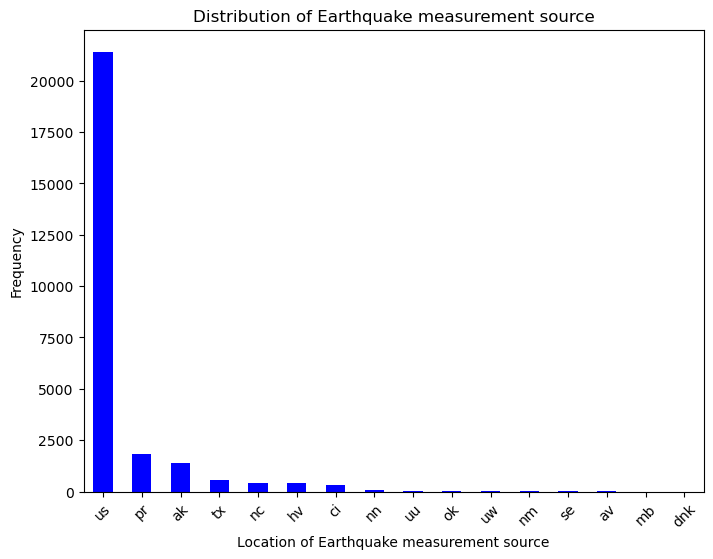

In [27]:
#Plotting a histogram with the distribution of locations
plt.figure(figsize=(8,6))
ax = location_count.plot(kind='bar', color = 'blue')
plt.title('Distribution of Earthquake measurement source')
plt.xlabel('Location of Earthquake measurement source')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

This analysis shows that the overwhelming majority of the data is from measurement sources in the US.  This does not necessarily mean that the Earthquakes are in the USA, but that the measurements are taken from sensors in the US, by the United States Geological Survey (USGS).  Therefore, this set should be analysed seperately to the rest of the data. This analysis will focus on the Earthquakes measured in the US region only.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'mb'),
  Text(1, 0, 'ml'),
  Text(2, 0, 'md'),
  Text(3, 0, 'mww'),
  Text(4, 0, 'mwr'),
  Text(5, 0, 'ml(texnet)'),
  Text(6, 0, 'mw'),
  Text(7, 0, 'mb_lg'),
  Text(8, 0, 'mlr'),
  Text(9, 0, 'mh'),
  Text(10, 0, 'mwb'),
  Text(11, 0, 'mlv'),
  Text(12, 0, 'ms_vx'),
  Text(13, 0, 'mwc'),
  Text(14, 0, 'mwp')])

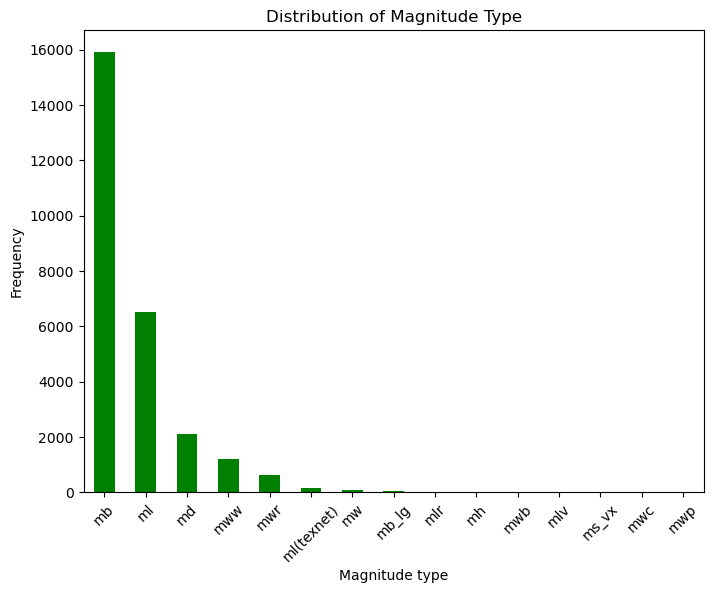

In [31]:
#finding the distribution of magnitude type
magtype_counts = eq_df['magType'].value_counts()

# Plotting histogram (bar chart)
plt.figure(figsize=(8, 6))
ax = magtype_counts.plot(kind='bar', color='green')
plt.title('Distribution of Magnitude Type')
plt.xlabel('Magnitude type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)




In [5]:
# show individual functions in these blocks
#load_data():


## 3.0 Data Cleaning

Reliable analysis begins with a dataset that is complete, consistent and physically meaningful. 
Earthquake data is particularly sensitive to measurement quality. Small errors in magnitude, 
depth, time or location can distort global patterns and weaken any statistical conclusions. 
For this reason, a structured and domain-appropriate cleaning pipeline was applied to the 
2023 global earthquake dataset to ensure that every event used in this project is valid, 
accurate and suitable for analysis.

The dataset provided by the USGS is generally well structured, but still contains a number 
of issues that must be addressed before performing meaningful analysis. These include 
occasional fully duplicated rows, multiple versions of the same earthquake (with earlier 
records containing outdated measurements), and a small number of values that fall outside 
physically realistic ranges. The aim of the cleaning process is not to remove large portions 
of the data or introduce unnecessary filtering, but simply to correct errors and ensure that 
each earthquake record is scientifically reasonable.

The cleaning pipeline used in this project consists of the following key steps:

**1. Work on a copy of the data**  
A fresh copy of the dataset is created to protect the original raw data. This avoids 
accidental modifications and preserves the integrity of the input file.

**2. Remove exact duplicate records**  
Fully duplicated rows occasionally appear in exported or merged datasets. These provide 
no new information and would artificially inflate earthquake counts if left in place. All 
exact duplicates were removed.

**3. Remove duplicate earthquake identifiers, keeping only the most recent update**  
The `id` field uniquely identifies each earthquake. In some cases, the same event appears 
more than once because the USGS updates its magnitude, depth or location as new sensor 
data arrives. The dataset was sorted by the `updated` timestamp, ensuring that only the 
most recent and most accurate version of each event is retained.

It is important to note that repeated `id` values do not represent different “stages” of an 
earthquake. Earthquakes do not physically change in magnitude or depth over time. 
Multiple entries simply reflect measurement corrections by the seismic network. 
Therefore, retaining only the latest updated version ensures analytical accuracy.

**4. Convert time fields into proper datetime format**  
The `time` and `updated` columns were converted from text into real datetime objects. 
This step is required for all time-based analysis such as monthly grouping, temporal 
visualisation and event ordering.

**5. Remove rows missing essential physical attributes**  
Every earthquake must have a valid `time`, `latitude`, `longitude`, `depth` and `mag`. 
Without these, the event cannot be plotted, positioned geographically, or included in 
magnitude or depth analysis. Any rows missing these core fields were removed. The 2023 
dataset is highly complete, so no events were lost at this stage.

**6. Apply geophysical validity checks**  
Basic physical constraints were enforced to ensure that all retained records represent real, 
possible earthquakes. These checks include:
- Latitude within −90 to 90 degrees  
- Longitude within −180 to 180 degrees  
- Depth being non-negative  
- Magnitude within the realistic range of 0 to 10  

Any record falling outside these limits was removed, as such values reflect data errors 
rather than genuine seismic activity.

Non-essential fields such as `gap`, `dmin`, `nst`, `horizontalError`, `magError` and 
`place` contain some missing values, but these do not prevent spatial or statistical analysis. 
Removing rows based on these optional metadata fields would unnecessarily reduce the 
dataset and bias the analysis toward only well-recorded earthquakes. These fields were 
therefore kept as they are.

In [ ]:
#Hasini
def clean_data(df):
    df = df.copy() # work on a copy to avoid modifying the original dataframe

    # Remove rows which are completely duplicated
    original_rows = len(df)
    df = df.drop_duplicates()
    print(f"Removed {original_rows - len(df)} exact duplicate rows.")

    # If the same earthquake ID appears more than once, keep the most reseantly added entry)
    rows_before_id_clean = len(df)
    df = (
        df.sort_values("updated") # oldest to newest
        .drop_duplicates(subset="id", keep="last")
    )
    print(f"Removed {rows_before_id_clean - len(df)} rows with duplicate earthquake based on IDs.")

    # Convert 'time' and 'updated' columns to datetime
    df["time"] = pd.to_datetime(df["time"], errors="coerce")
    df["updated"] = pd.to_datetime(df["updated"], errors="coerce")

    # Drop rows missing essential earthquake information
    essential_cols = ["time", "latitude", "longitude", "depth", "mag"]
    rows_before_essential_clean = len(df)
    df = df.dropna(subset=essential_cols)
    print(f"Removed {rows_before_essential_clean - len(df)} rows with missing essential earthquake information in {essential_cols}.")

    # Keep only valid geographical ranges
    rows_before_ranges = len(df)

    valid_lat = df["latitude"].between(-90, 90)
    valid_lon = df["longitude"].between(-180, 180)
    valid_depth = df["depth"] >= 0
    valid_mag = df["mag"].between(0, 10)

    df = df[valid_lat & valid_lon & valid_depth & valid_mag]
    print(f"Removed {rows_before_ranges - len(df)} rows with invalid geographical ranges.")

    return df

In [ ]:
#Clean the dataset and check how its shape and structure change after cleaning.
#Hasini
print("Raw dataset shape:", eq_df.shape)

cleaned_eq_df = clean_data(eq_df)

print("Cleaned dataset shape:", cleaned_eq_df.shape)
cleaned_eq_df.info()
cleaned_eq_df.head()

Raw dataset shape: (26642, 22)
Removed 1960 exact duplicate rows.
Removed 0 rows with duplicate earthquake based on IDs.
Removed 0 rows with missing essential earthquake information in ['time', 'latitude', 'longitude', 'depth', 'mag'].
Removed 43 rows with invalid geographical ranges.
Cleaned dataset shape: (24639, 22)
<class 'pandas.core.frame.DataFrame'>
Index: 24639 entries, 19 to 18434
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   time             24639 non-null  datetime64[ns, UTC]
 1   latitude         24639 non-null  float64            
 2   longitude        24639 non-null  float64            
 3   depth            24639 non-null  float64            
 4   mag              24639 non-null  float64            
 5   magType          24639 non-null  object             
 6   nst              23230 non-null  float64            
 7   gap              23228 non-null  float64       

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
19,2023-01-01 09:04:40.710000+00:00,17.830333,-65.985500,10.92,2.78,md,8.0,245.0,0.177300,0.14,...,2023-01-01 09:28:26.140000+00:00,"16 km S of Lamboglia, Puerto Rico",earthquake,0.87,0.63,0.126663,7.0,reviewed,pr,pr
22,2023-01-01 10:09:37.830000+00:00,18.206500,-67.117333,21.88,2.95,md,26.0,97.0,0.005188,0.13,...,2023-01-01 11:14:15.230000+00:00,"2 km ENE of Mayagüez, Puerto Rico",earthquake,0.27,0.40,0.185128,10.0,reviewed,pr,pr
53,2023-01-01 23:56:53.930000+00:00,19.360100,-65.725600,34.00,3.62,md,14.0,270.0,1.110400,0.44,...,2023-01-02 00:32:06.212000+00:00,"103 km N of Suárez, Puerto Rico",earthquake,3.64,25.85,0.080000,4.0,reviewed,pr,pr
65,2023-01-02 04:15:00.130000+00:00,17.947833,-66.908500,12.69,2.80,md,22.0,192.0,0.038830,0.13,...,2023-01-02 05:22:04.140000+00:00,Puerto Rico region,earthquake,0.34,0.28,0.096839,16.0,reviewed,pr,pr
79,2023-01-02 06:56:51.300000+00:00,17.946333,-67.008500,10.55,2.88,md,5.0,230.0,0.113300,0.17,...,2023-01-02 08:25:00.790000+00:00,"5 km SE of La Parguera, Puerto Rico",earthquake,1.27,0.82,0.104091,5.0,reviewed,pr,pr


Overall, The cleaning steps removed a small number of fully duplicated rows and older versions
of earthquakes that had been updated by the USGS system. No rows were removed due to
missing essential fields, confirming that the dataset is generally complete. A small number
of events were removed because they contained physically impossible values such as invalid
coordinates or negative depths.

The final cleaned dataset is consistent, physically valid and ready for the exploratory and
bivariate analysis sections that follow. Importantly, the global structure of the data has been
preserved, which is essential for analysing worldwide earthquake behaviour in 2023.

In [8]:
#engineer_features() 

In [9]:
#plot_magnitude_distribution()

In [10]:
#plot_depth_boxplot()

Object-Oriented Programming Section  

Create at least two classes: 

Class 1: EarthquakeDataset 

Handles: 

Loading 

Cleaning 

Feature engineering 

Class 2: EarthquakeVisualizer 

Handles: 

All plots (KDE, boxplots, scatter, violin, heatmap, 3D) 

Optional Class: EarthquakeModel 

Handles: 

Classification 

Clustering 

You must show good encapsulation, methods, attributes, and documentation. 

A-grade notebooks always demonstrate clear OOP. 

Data Preparation Section 

Using your functions & classes: 

Load dataset 

Convert timestamps 

Handle missing values 

Clean column types 

Feature engineering (month, depth class, strong quake flag) 

Show: 

head() 

info() 

describe() 

Include short commentary below each output, not above. 

Univariate Analysis Section 

Follow A-grade style: 

For each variable: 

One sentence explaining why this variable matters 

One function call to create the plot 

Short interpretation paragraph 

Variables: 

Magnitude (KDE) 

Depth (boxplot + histogram) 

NSt or magNst 

Dmin 

Monthly or daily counts 

Keep code clean and modular. 

In [11]:
#magnitude(KDE) Dan
#Depth
#NSt
#Dmin
#monthly counts


Bivariate Analysis Section 

Use the same pattern: 

explain → code → visual → interpretation 

Analyses: 

Magnitude vs Depth + correlation 

Depth vs DepthError 

Net vs Depth (violin) + ANOVA 

Time vs Magnitude 

MagType vs Net (heatmap)

3D Visualisation Section (CT7201 Bonus Marks) 

Implement at least one 3D visual: 

3D scatter plot 

(lat, lon, depth coloured by magnitude) 

Optional: 

3D clustering visual 

3D classification decision boundary 

This significantly boosts grade potential because it shows advanced scripting.

Machine Learning Section 

The ML part doesn’t need to be huge: 

Recommended simple model: 

Logistic Regression 
 OR 

Decision Tree 
 OR 

K-means clustering 

Must include: 

Train/test split 

Confusion matrix or cluster summary 

Short interpretation 

This satisfies the “application of algorithms” requirement. 

Discussion Section 

Summarise: 

global earthquake patterns 

spatial trends 

magnitude–depth relationships 

model performance 

limitations 

strengths of scripting approach 

Write academically. 

Conclusion Section 

Short, direct summary: 

what was achieved 

key insights 

usefulness of Python scripting 

References 

USGS 

Python libraries 

Any academic papers if used 